# Empatica Feature Extraction Pipeline

This notebook presents several examples of all flirt functionalities for the Empatica E4. We begin by introducing the
simplest case -- from the downloaded zip file to comprehensive features. In the subsequent sections, the more advanced
functionalities will be introduced. But first:

In [4]:
import flirt.with_
flirt.with_.me()

'You must be the square root of 2 because I feel irrational around you.'

## The high-level case
FLIRT's "simple" functionality provides an off-the-shelf functionality to read and transform the Empatica .zip file into features directly. FLIRT calculates features for each time window (parameter window_length), and shifts each window by the step size (parameter window_step_size). Features are calculated for the modalities ACC, EDA, HR, and IBI in the default setting.

In [54]:
import flirt.with_

zip_file_path = "../test/wearable-data/empatica/1560460372.zip"

data = flirt.with_.empatica(zip_file_path,
                            window_length = 180,
                            window_step_size = 1,
                            hrv_features = True,
                            eda_features = True,
                            acc_features = True)
data.head(10)

HRV features: 100%|██████████| 29794/29794 [00:16<00:00, 1812.63it/s]


EDA features:   0%|          | 0/30693 [00:00<?, ?it/s]

<ipython-input-54-bd77bec37291>:5: UserWarning: tonic_entropy contains more than 5% (actual: 8.64%) nan, inf, or -inf values. We recommend to delete this feature column.
  data = flirt.with_.empatica(zip_file_path,
<ipython-input-54-bd77bec37291>:5: UserWarning: phasic_entropy contains more than 5% (actual: 72.74%) nan, inf, or -inf values. We recommend to delete this feature column.
  data = flirt.with_.empatica(zip_file_path,


ACC features:   0%|          | 0/30694 [00:00<?, ?it/s]

,num_ibis,hrv_mean_nni,hrv_median_nni,hrv_range_nni,hrv_sdsd,hrv_rmssd,hrv_nni_50,hrv_pnni_50,hrv_nni_20,hrv_pnni_20,...,acc_l2_n_above_mean,acc_l2_n_below_mean,acc_l2_n_sign_changes,acc_l2_iqr,acc_l2_iqr_5_95,acc_l2_pct_5,acc_l2_pct_95,acc_l2_entropy,acc_l2_perm_entropy,acc_l2_svd_entropy
2019-06-13 21:15:52+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1050,4710,0,0.63413,9.719833,60.231221,69.951054,8.655509,0.960142,0.257534
2019-06-13 21:15:53+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1026,4734,0,0.63413,9.719833,60.231221,69.951054,8.655511,0.959421,0.257453
2019-06-13 21:15:54+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1004,4756,0,0.63413,9.719833,60.231221,69.951054,8.655514,0.958938,0.257355
2019-06-13 21:15:55+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1027,4733,0,0.63413,9.480819,60.414816,69.895635,8.655522,0.957715,0.257002
2019-06-13 21:15:56+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,983,4777,0,0.63413,9.249531,60.646105,69.895635,8.655531,0.957715,0.256799
2019-06-13 21:15:57+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,975,4785,0,0.63413,9.142858,60.752778,69.895635,8.655548,0.957097,0.255630
2019-06-13 21:15:58+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1009,4751,0,0.63413,8.798245,60.909359,69.707603,8.655677,0.956474,0.251740
2019-06-13 21:15:59+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1000,4760,0,0.63413,8.798245,60.909359,69.707603,8.655678,0.955973,0.251689
2019-06-13 21:16:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,979,4781,0,0.63413,8.798245,60.909359,69.707603,8.655678,0.955468,0.251682
2019-06-13 21:16:01+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,964,4796,0,0.63413,8.773212,60.934391,69.707603,8.655679,0.955468,0.251560


Text(0.5, 1.0, 'ACC - Mean L2')

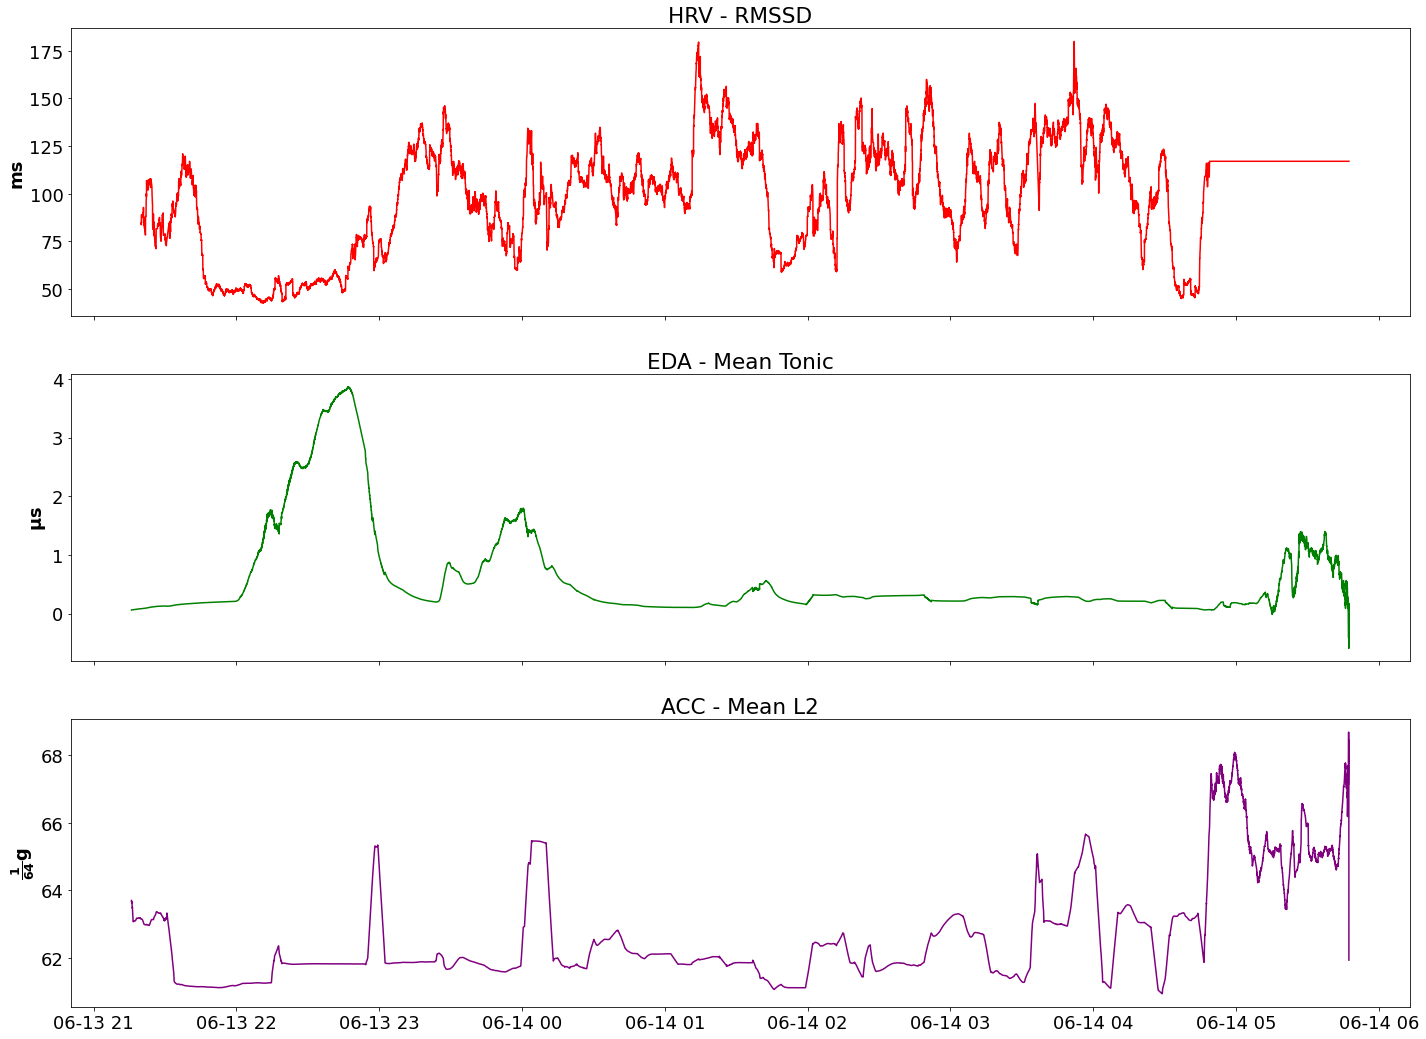

In [37]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18, 'text.latex.preamble':r'\usepackage{sfmath} \boldmath'})


# Select sensor modality and plot some features
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(24, 18))
axs = axs.ravel()

axs[0].plot(data['hrv_rmssd'], color = "red")
axs[0].set_title('HRV - RMSSD')
axs[0].set_ylabel('ms', weight = 'bold')

axs[1].plot(data['eda_tonic_mean'], color = "green")
axs[1].set_ylabel(r'$\mathbf{\mu s}$')
axs[1].set_title('EDA - Mean Tonic')

axs[2].plot(data['acc_l2_mean'], color = "purple")
axs[2].set_ylabel(r'$\mathbf{\frac{1}{64}g}$')
axs[2].set_title('ACC - Mean L2')

## The low-level case
FLIRT allows its user to access low-level functionalities. A customized pipeline can be built by building by chaining different components to each other.

### Preparation
Reading all desired sensor data from Empatica E4 format into DataFrames.

In [38]:
import flirt.reader.empatica

# After unpacking the Empatica E4 zip-file, read the desired sensor modality into a DataFrame
acc_df = flirt.reader.empatica.read_acc_file_into_df("../test/wearable-data/empatica/ACC.csv")
ibi_df = flirt.reader.empatica.read_ibi_file_into_df("../test/wearable-data/empatica/IBI.csv")
eda_df = flirt.reader.empatica.read_eda_file_into_df("../test/wearable-data/empatica/EDA.csv")

# Support for additional sensor modalities
bvp_df = flirt.reader.empatica.read_bvp_file_into_df("../test/wearable-data/empatica/BVP.csv")
hr_df = flirt.reader.empatica.read_hr_file_into_df("../test/wearable-data/empatica/HR.csv")
temp_df = flirt.reader.empatica.read_temp_file_into_df("../test/wearable-data/empatica/TEMP.csv")

### HRV Features

In [55]:
import flirt
hrv_features = flirt.get_hrv_features(ibi_df['ibi'],
                                      window_length = 180, 
                                      window_step_size = 1,
                                      domains = ['td', 'fd', 'stat'], 
                                      threshold = 0.2,
                                      clean_data = True)

HRV features: 100%|██████████| 8673/8673 [00:15<00:00, 568.32it/s] 


Text(0, 0.5, 'ms')

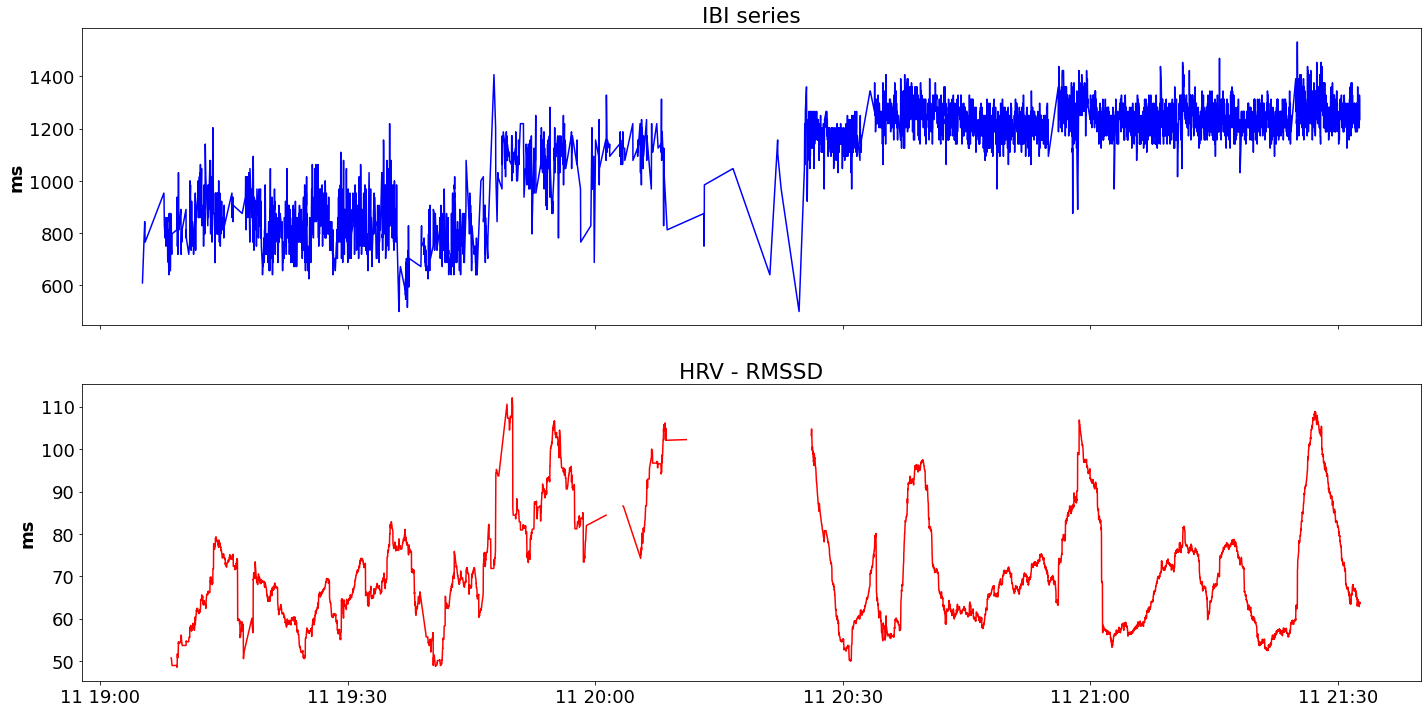

In [48]:
# Select sensor modality and plot some features
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(24, 12))
axs = axs.ravel()

axs[0].plot(ibi_df['ibi'], color = "blue")
axs[0].set_title('IBI series')
axs[0].set_ylabel('ms', weight = 'bold')

axs[1].plot(hrv_features['hrv_rmssd'], color = "red")
axs[1].set_title('HRV - RMSSD')
axs[1].set_ylabel('ms', weight = 'bold')

#_ = hrv_features[['hrv_mean_hr', 'hrv_rmssd']].plot(figsize=(24, 18))

### ACC Features

ACC features:   0%|          | 0/313 [00:00<?, ?it/s]

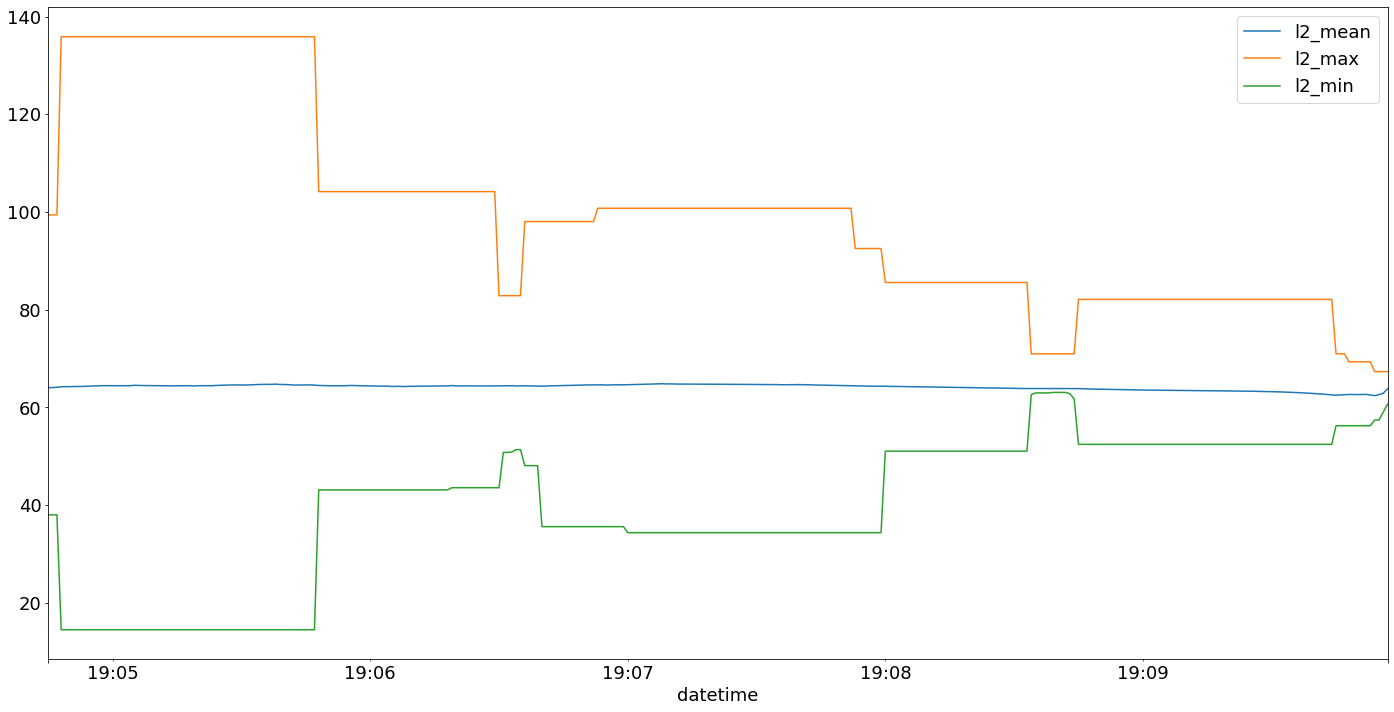

In [57]:
acc_features = flirt.get_acc_features(acc_df,
                                      window_length = 60, 
                                      window_step_size = 1,
                                      data_frequency = 32)

_ = acc_features[['l2_mean', 'l2_max', 'l2_min']].plot(figsize=(24, 12))

### EDA

EDA features:   0%|          | 0/2500 [00:00<?, ?it/s]

/Users/sfoell/anaconda3/envs/basic/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: UserWarning: phasic_entropy contains more than 5% (actual: 74.12%) nan, inf, or -inf values. We recommend to delete this feature column.
  exec(code_obj, self.user_global_ns, self.user_ns)


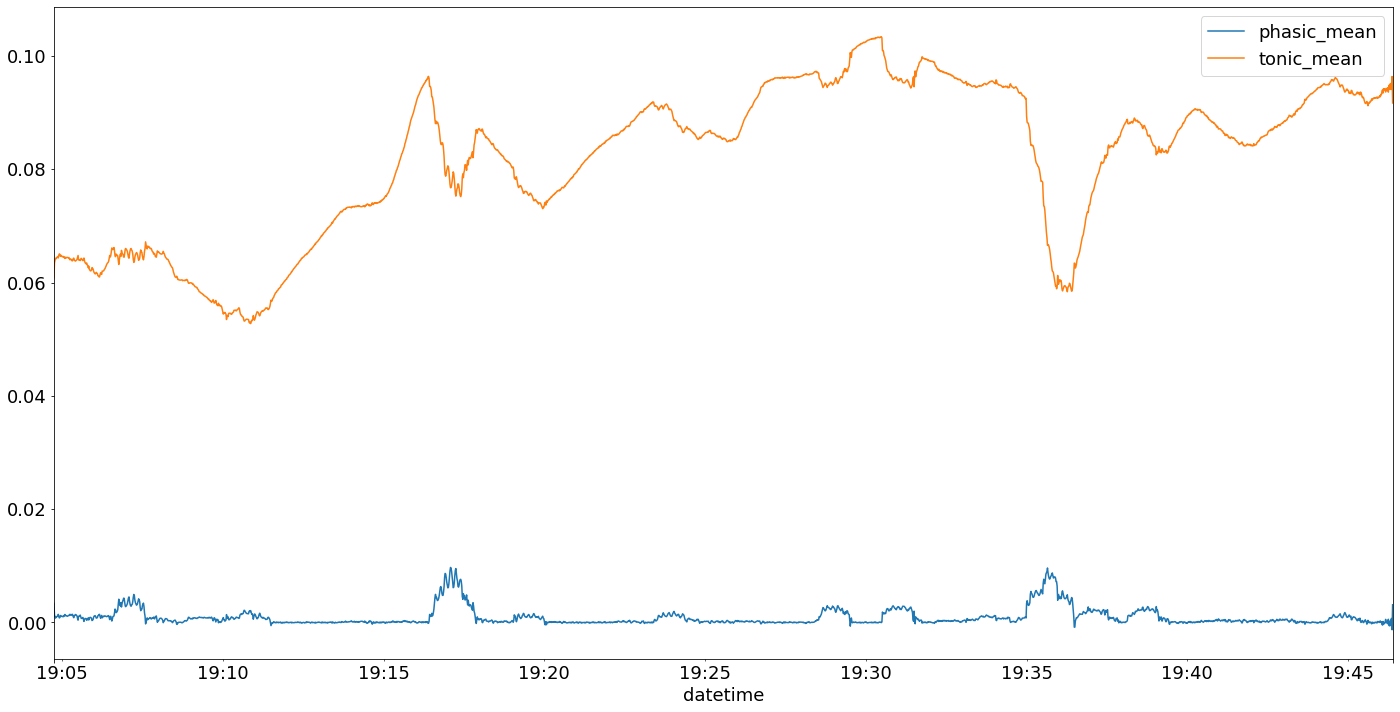

In [56]:
eda_features = flirt.get_eda_features(eda_df['eda'],
                                      window_length = 60, 
                                      window_step_size = 1,
                                      data_frequency = 4)

_ = eda_features[['phasic_mean', 'tonic_mean']].plot(figsize=(24, 12))